In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
titanic_train = pd.read_csv('titanic/train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

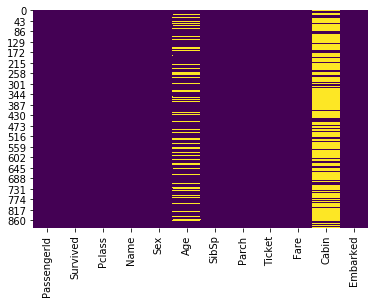

In [5]:
sns.heatmap(titanic_train.isnull(), cbar=False,cmap = 'viridis')

In [6]:
titanic_train[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Getting name prefix

In [7]:
titanic_train['Prefix'] = titanic_train["Name"].apply(lambda name: re.search(',(.*?)\.',name).group(1))

In [8]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [9]:
titanic_train.groupby("Prefix")["PassengerId"].count().sort_values()

Prefix
 Capt              1
 Ms                1
 Mme               1
 Sir               1
 Lady              1
 the Countess      1
 Don               1
 Jonkheer          1
 Major             2
 Mlle              2
 Col               2
 Rev               6
 Dr                7
 Master           40
 Mrs             125
 Miss            182
 Mr              517
Name: PassengerId, dtype: int64

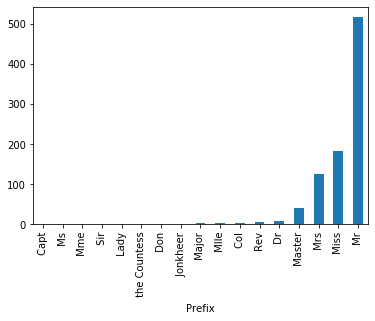

In [10]:
titanic_train.groupby("Prefix")["PassengerId"].count().sort_values().plot.bar()

# Analysis on Fare variable

Notice: Minimun fare is 0

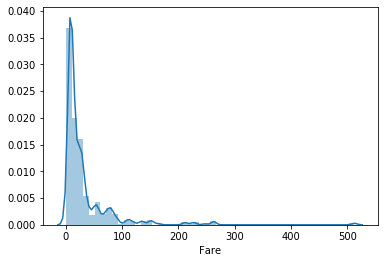

In [11]:
sns.distplot(titanic_train['Fare'],bins=50)

In [12]:
len(titanic_train[ titanic_train['Fare'] ==0].index) # 15 people paid nothing.

15

In [13]:
zero_fare_df = titanic_train[titanic_train['Fare'] == 0]
zero_fare_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr


In [14]:
zero_fare_df.groupby(by = 'Survived').count().PassengerId # out of 15 passenger who paid 0 fare only 1 survived.

Survived
0    14
1     1
Name: PassengerId, dtype: int64

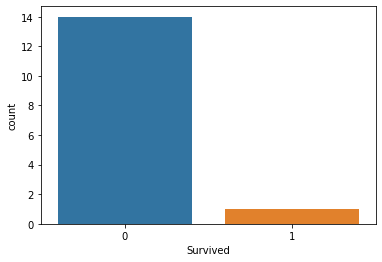

In [15]:
sns.countplot(x ='Survived',data = zero_fare_df )

In [16]:
zero_fare_df.groupby(by = ['Sex']).count().PassengerId #All of the 15 passenger who paid 0 fare were male.

Sex
male    15
Name: PassengerId, dtype: int64

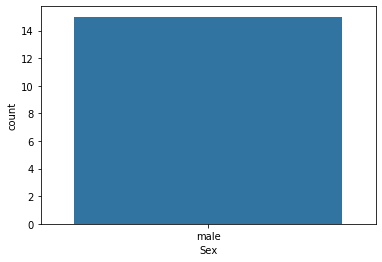

In [17]:
sns.countplot(x = 'Sex',data = zero_fare_df)

In [18]:
zero_fare_df.groupby(by = ['Embarked']).count().PassengerId #All of the 15 passenger who paid 0 fare, embarked from 'S'.

Embarked
S    15
Name: PassengerId, dtype: int64

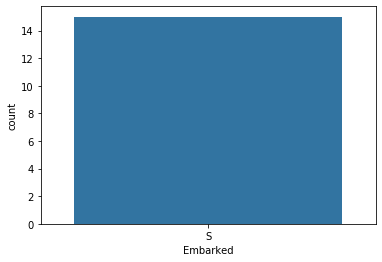

In [19]:
sns.countplot(x = 'Embarked', data = zero_fare_df)

<li>15 people does not pay anything for the travel. 
<li>All of them are male. 
<li>All of them Embarked from 'S'.
<li>15 out of 1 person survived the tragedy.

In [20]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


# Analysis on Survived Variable

In [21]:
titanic_train.groupby(['Survived']).count().PassengerId 
# Total - 891
# Survived - 342
# Died - 549

Survived
0    549
1    342
Name: PassengerId, dtype: int64

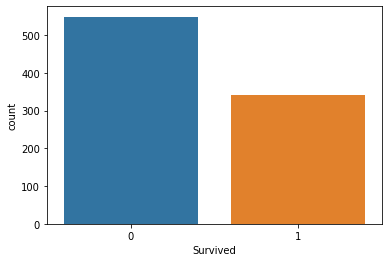

In [22]:
ax = sns.countplot(x="Survived", data=titanic_train)

1. Total - 891
2. Survived - 342
3. Died - 549

In [23]:
titanic_train.groupby(['Survived','Sex']).count().PassengerId

#   Survived:
#            male: 109
#            female: 233
#    Not Survived:
#            male: 468
#            female: 81

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

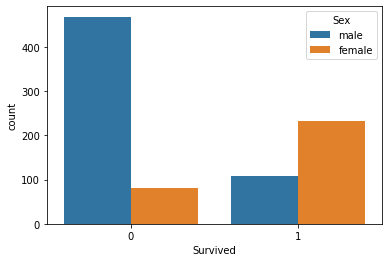

In [24]:
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic_train)

1.  Survived:
            male: 109
            female: 233
2.  Not Survived:
            male: 468
            female: 81

In [25]:
titanic_train.groupby(['Survived','Pclass']).count().PassengerId

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64

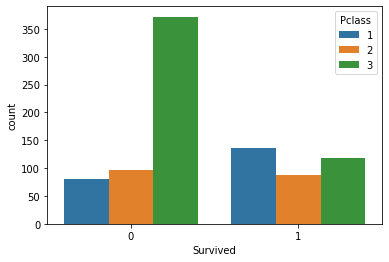

In [26]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic_train)

1. Survived:
            male: 109
            female: 233
2. Not Survived:
           male: 468
           female: 81

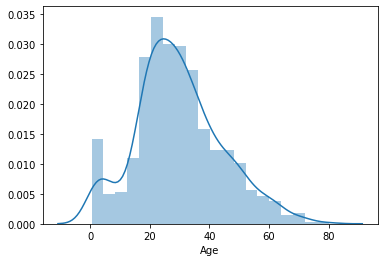

In [27]:
sns.distplot(titanic_train['Age'])

In [28]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [29]:
titanic_train.groupby(['SibSp']).count().PassengerId

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: PassengerId, dtype: int64

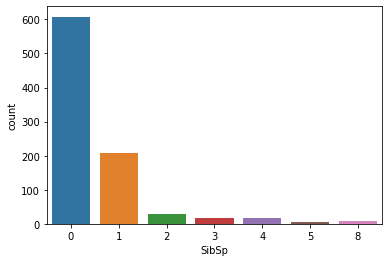

In [30]:
sns.countplot('SibSp', data = titanic_train)

In [31]:
titanic_train.groupby('Parch').count().PassengerId

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: PassengerId, dtype: int64

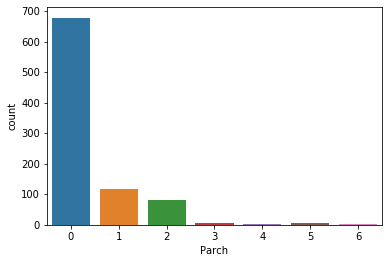

In [32]:
sns.countplot('Parch', data = titanic_train)

# Data Cleaning

### Cleaning rare category of Prefix

In [33]:
titanic_train.groupby("Prefix")["PassengerId"].count().sort_values()

Prefix
 Capt              1
 Ms                1
 Mme               1
 Sir               1
 Lady              1
 the Countess      1
 Don               1
 Jonkheer          1
 Major             2
 Mlle              2
 Col               2
 Rev               6
 Dr                7
 Master           40
 Mrs             125
 Miss            182
 Mr              517
Name: PassengerId, dtype: int64

In [34]:
temp = titanic_train.groupby("Prefix")["PassengerId"].count()

In [35]:
temp_def = temp[temp>10].index
titanic_train['Prefix'] = np.where(titanic_train['Prefix'].isin(temp_def), titanic_train['Prefix'], "Rare_prefix")

In [36]:
titanic_train.groupby("Prefix")["PassengerId"].count()

Prefix
 Master         40
 Miss          182
 Mr            517
 Mrs           125
Rare_prefix     27
Name: PassengerId, dtype: int64

### Age, Cabin

Removing / Handling Null value.<br>
Check which columns has `NULL` values
1. Age 
2. Cabin

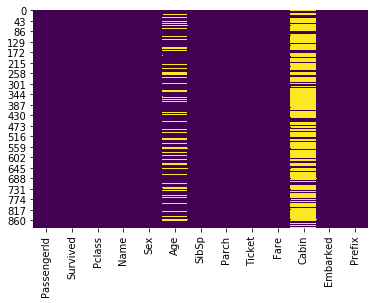

In [37]:
sns.heatmap(titanic_train.isnull(), cbar=False,cmap = 'viridis')

# Analysis on Age vaiable

In [38]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


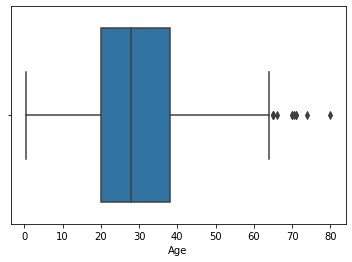

In [39]:
sns.boxplot(x = "Age", data = titanic_train)

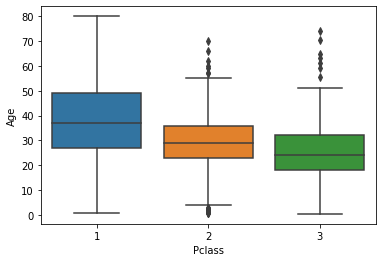

In [40]:
sns.boxplot(x = "Pclass", y = "Age", data = titanic_train)

In [41]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [42]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(impute_age,axis=1)

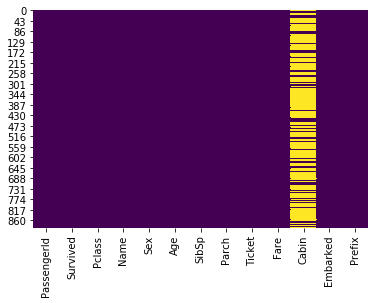

In [43]:
sns.heatmap(titanic_train.isnull(), cbar=False,cmap = 'viridis')

In [44]:
titanic_train.drop('Cabin',axis=1,inplace = True)

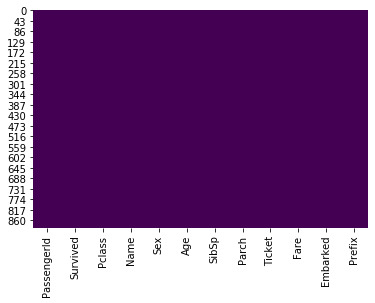

In [45]:
sns.heatmap(titanic_train.isnull(), cbar=False,cmap = 'viridis')

In [46]:
sex = pd.get_dummies(titanic_train['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_train['Embarked'],drop_first=True)
prefix = pd.get_dummies(titanic_train['Prefix'],drop_first=True)

In [47]:
titanic_train.drop(['Sex','Embarked','Name','Ticket','Prefix'],axis=1,inplace=True)

In [48]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [49]:
titanic_train = pd.concat([titanic_train,sex,embark,prefix],axis=1)

In [50]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Rare_prefix
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,1,0,0


In [51]:
y = titanic_train['Survived']

In [52]:
titanic_train.drop(['Survived'],axis=1,inplace=True)

In [53]:
X = titanic_train

In [54]:

from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

### Random Forest

In [57]:
rf = RandomForestClassifier(n_jobs=-1)

In [58]:
n_estimators = [200,300,400,500,600,700,800,900,1000]
max_features = ['auto', 'sqrt']
max_depth = [10,20,20,40,50,60,70,80,90]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [59]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [60]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 20, 40, 50, 60,
                                                      70, 80, 90],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700, 800, 900,
                                                         1000]},
                   random_state=42, verbose=2)

In [61]:
predictions = rf_random.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
accuracy

0.832089552238806

### XGBoost

In [62]:
import xgboost as xgb

In [63]:
xg = xgb.XGBClassifier()

In [64]:
param_grid = {
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0,],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0],
        'n_estimators': [100,200,200,400,500,600]}

In [65]:
xg_random = RandomizedSearchCV(estimator = xg, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
xg_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.7s finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           verbosity=None),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bylevel': [0.4, 0.5, 0.6,
  

In [66]:
predictions = xg_random.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

### Test

In [67]:
test = pd.read_csv("titanic/test.csv")

In [68]:
test['Prefix'] = test["Name"].apply(lambda name: re.search(',(.*?)\.',name).group(1))

In [69]:
temp = test.groupby("Prefix")["PassengerId"].count()
temp_def = temp[temp>10].index
test['Prefix'] = np.where(test['Prefix'].isin(temp_def), test['Prefix'], "Rare_prefix")
test.groupby("Prefix")["PassengerId"].count()

Prefix
 Master         21
 Miss           78
 Mr            240
 Mrs            72
Rare_prefix      7
Name: PassengerId, dtype: int64

In [70]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [71]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [72]:
test.drop('Cabin',axis=1,inplace = True)

In [73]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
prefix = pd.get_dummies(test['Prefix'],drop_first=True)

In [74]:
test = pd.concat([test,sex,embark,prefix],axis=1)

In [75]:
test.drop(['Sex','Embarked','Name','Ticket','Prefix'],axis=1,inplace=True)

In [76]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Rare_prefix
0,892,3,34.5,0,0,7.8292,1,1,0,0,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,1,0,0,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,1,0,0
4,896,3,22.0,1,1,12.2875,0,0,1,0,0,1,0


In [77]:
test["Fare"].fillna(X_train['Fare'].median(), inplace = True)

In [78]:
rf_predict = rf_random.predict(test)
sub = pd.DataFrame()
sub = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':rf_predict})
sub.to_csv('rf_predict.csv', index=False)
sub.head(2)

,PassengerId,Survived
0,892,0
1,893,0


In [79]:
xg_predict = xg_random.predict(test)
sub = pd.DataFrame()
sub = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':xg_predict})
sub.to_csv('xg_predict.csv', index=False)
sub.head(2)

,PassengerId,Survived
0,892,0
1,893,0
